# Project 2 Cluster
Using k-means and Agglomerative clustering algorithm for image compression in various formats.  
Finding the Reconstruction Error and Compression Rate for each and analyze them. 
***
Packages used: numpy, sklearn, PIL, os
***
Clustering analysis belongs to unsupervised machine learning.  
Unsupervised learning: learning from data without predefined labels, i.e., learning by observations.   
In clustering, similarities between objects (instances) according to the characteristics are found in the data and grouping similar objects into clusters. 
## Types of Clustering
### Centroid-based clustering
Clusters are represented by a central vector, which may not necessarily be a member of the data set. When the number of clusters is fixed at K, the algorithm finds the K cluster centers and assigns the objects to the nearest cluster center, such that the distances from the cluster are minimized.
Eg. K-means
### Connectivity-based (Hierarchical) clustering
Cluster analysis based on the core idea of objects being more related to nearby objects than to objects farther away. The algorithm connect "objects" to form "clusters" based on their distance.  
Eg. Agglomerative clustering (average, single, and complete)

In [1]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from PIL import Image
from IPython.display import display
import os

Reading the Image

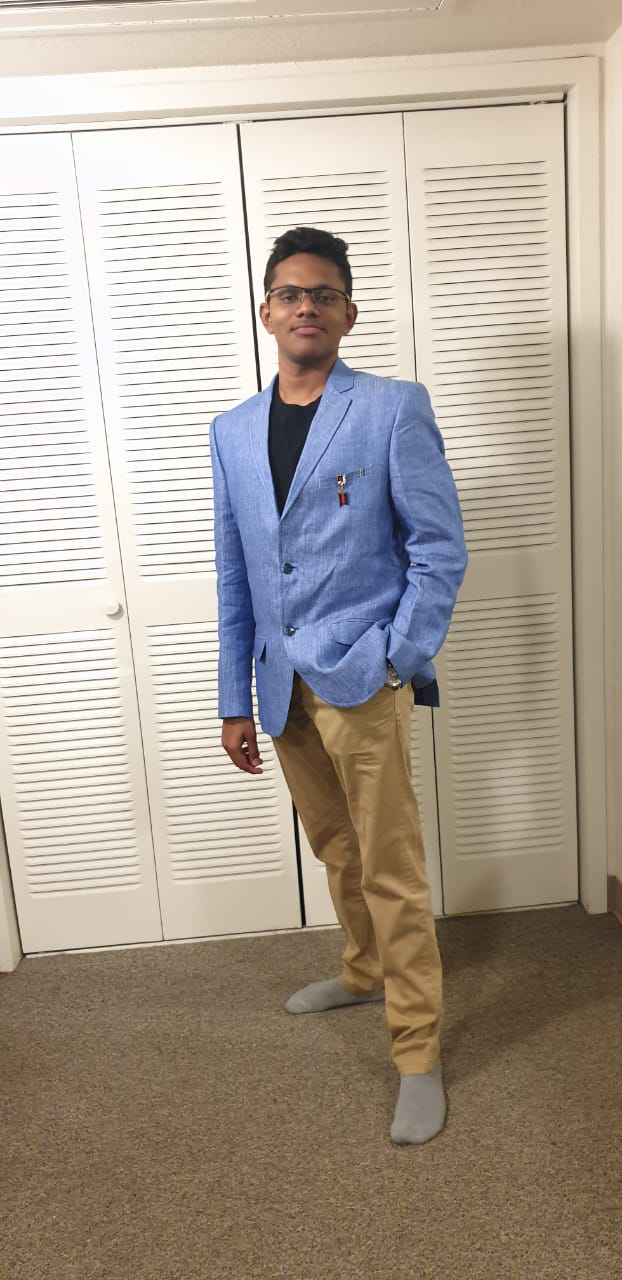

In [2]:
image = Image.open('Tatwik.jpg')
display(image)

# Convert the PIL Image object to a NumPy array
image = np.array(image)

# Get the size of the image in bytes
original_image_size = os.path.getsize('Tatwik.jpg')

## Image compression with k-means
A k-means clustering algorithm can be used for image compression. The image is divided into non overlapping 𝑐 × 𝑐 windows and these 𝑐 2-dimensional vectors make up the sample. With a given 𝑘, we do 𝑘-means clustering. The reference vectors and the index for each window are sent over the communication line. At the receiving end, the image is then reconstructed by reading from the table of reference vectors using the indices. For each pair of (𝑘, 𝑐), 
1) The compressed images are saved as jpg files
2) Each pair of (𝑘, 𝑐) will have a reconstruction error $$ E = \sum_{t} ||x^t -\hat{x}||^2$$ and a compression rate (6 pairs of rates).  
The image is be RGB-colored, so each window needed to be flatten into a vector of length 𝑐 × 𝑐 × 3 and then converted back to a 𝑐 × 𝑐 × 3 matrix when reconstructing the compressed image.

***
The code below performs image compression using K-Means clustering. It iterates through different combinations of 'k' (number of clusters) and 'c' (window size) values. For each combination, it divides the input image into overlapping windows, applies K-Means clustering to these windows, and reconstructs the compressed image using cluster centers. It calculates the Mean Squared Error (MSE) between the original and compressed images, displays the compressed image, saves it to a file, and calculates the compression rate. The results, including 'k', 'c', MSE, and compression rate, are stored in a list for further analysis or comparison.

In [3]:
kValues = [4, 8]
cValues = [20, 40, 60]

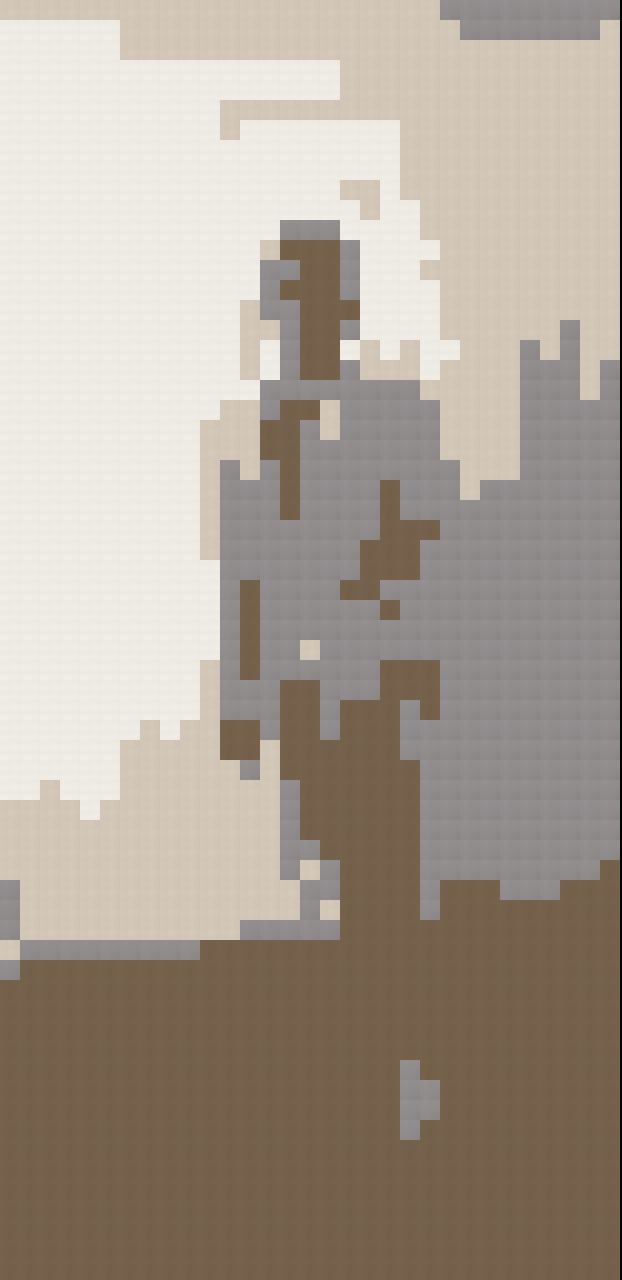

Saved as 'Tatwik_compressed_k4_c20.jpg


C:\Users\tatwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


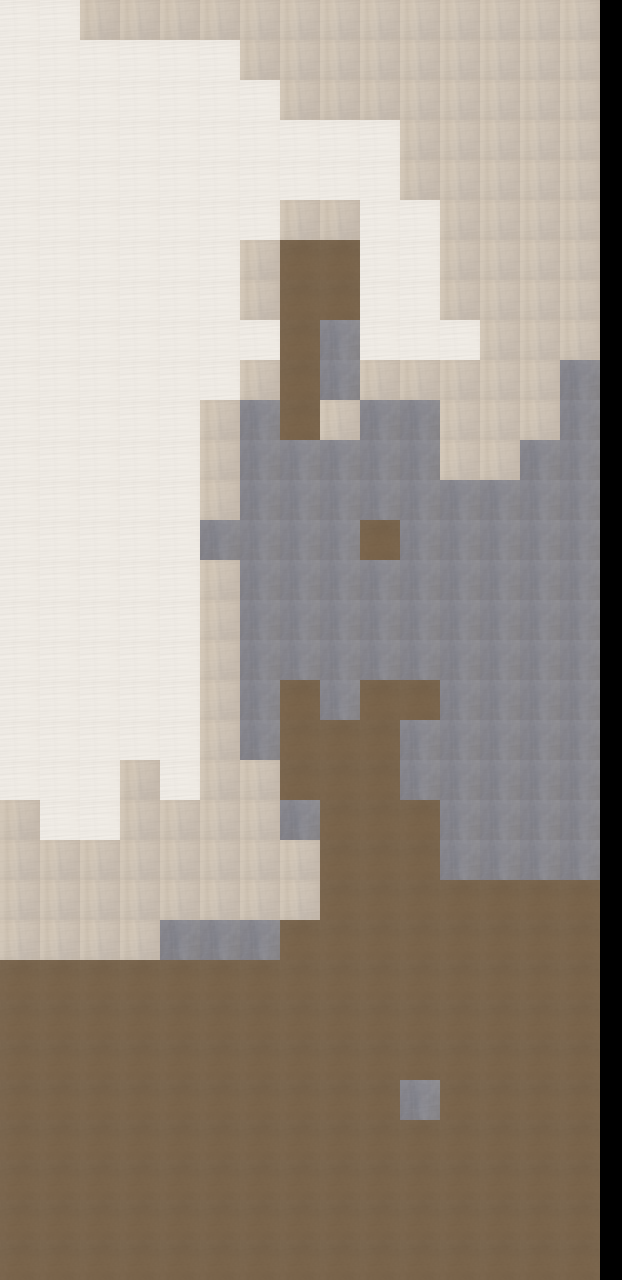

Saved as 'Tatwik_compressed_k4_c40.jpg


C:\Users\tatwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


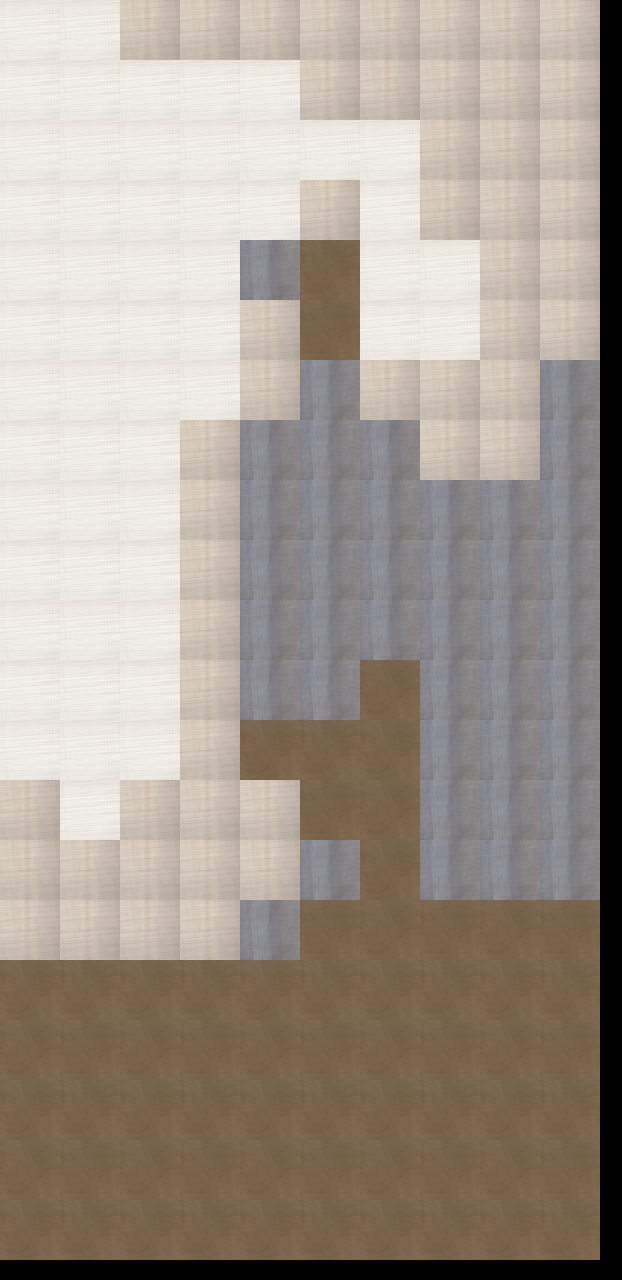

Saved as 'Tatwik_compressed_k4_c60.jpg


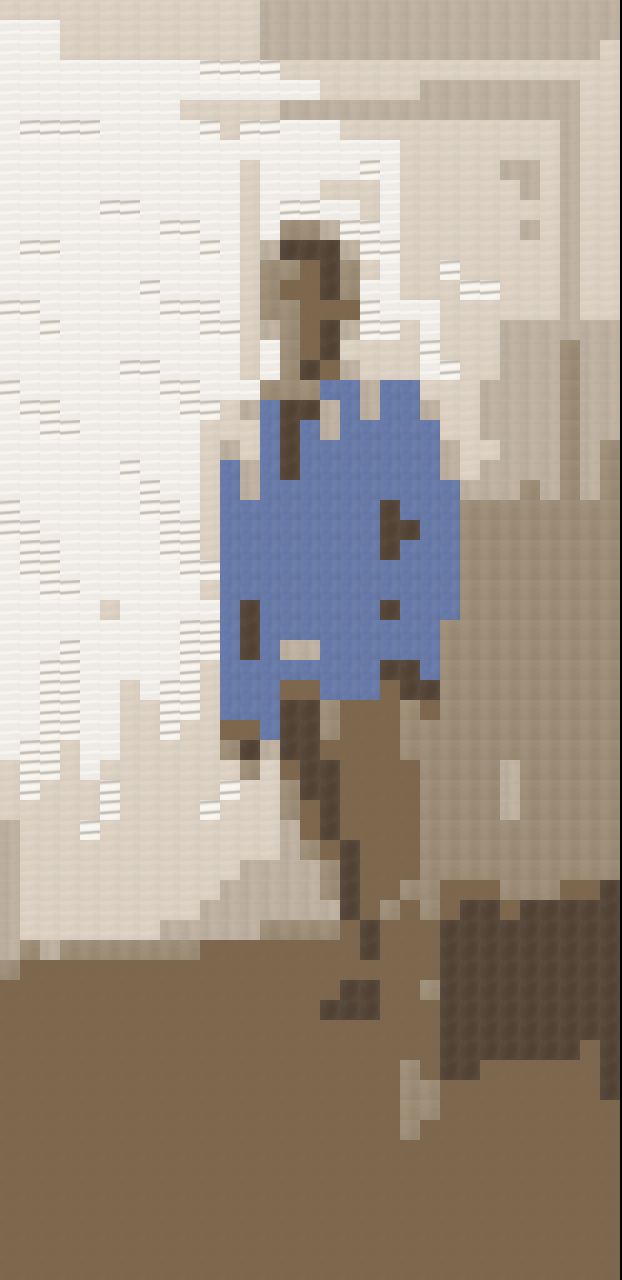

Saved as 'Tatwik_compressed_k8_c20.jpg


C:\Users\tatwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


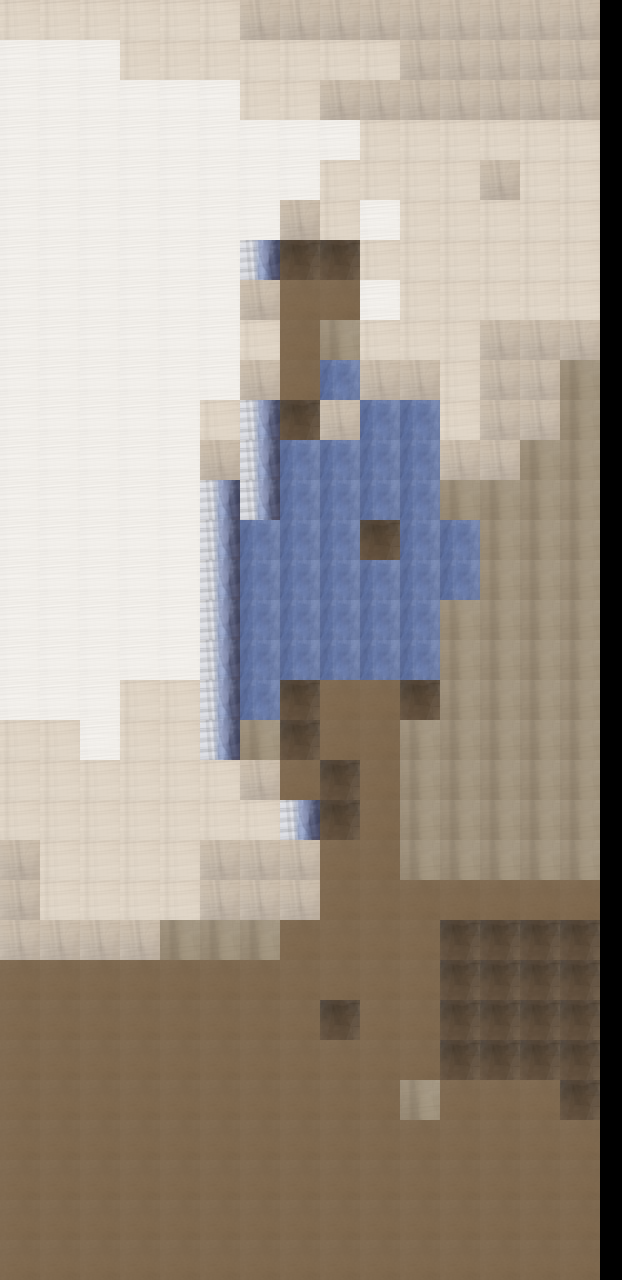

Saved as 'Tatwik_compressed_k8_c40.jpg


C:\Users\tatwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


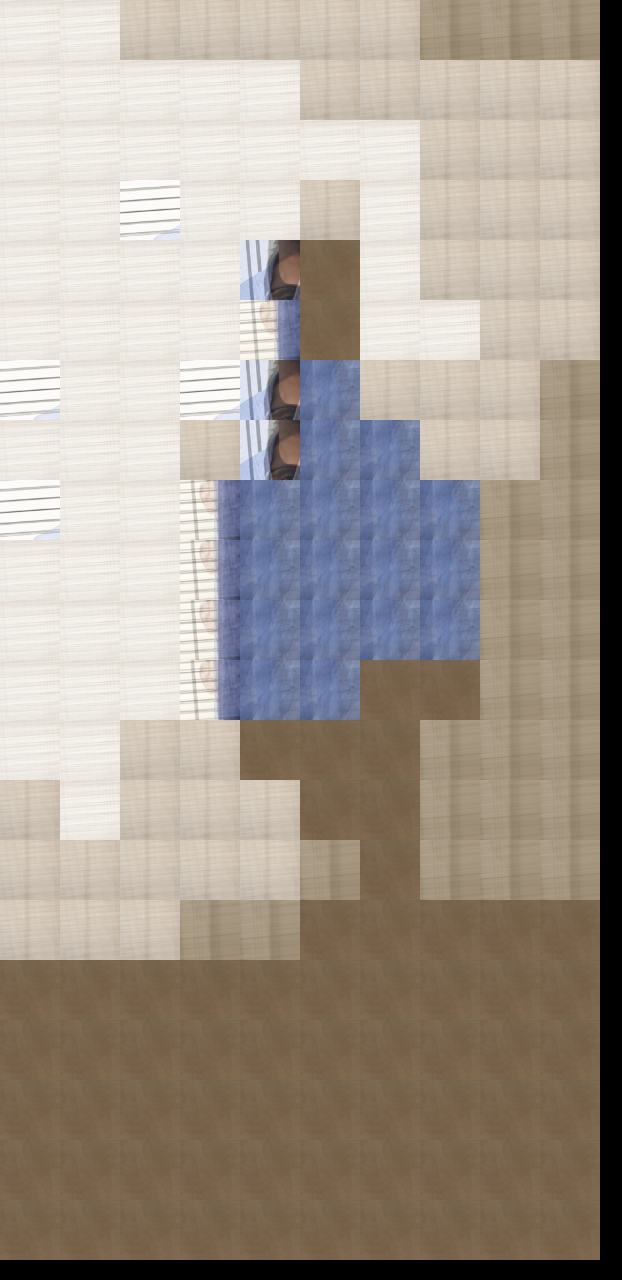

Saved as 'Tatwik_compressed_k8_c60.jpg


In [4]:
results = []

# Loop through different combinations of 'k' and 'c' values
for k in kValues:
    for c in cValues:
        # Get dimensions of the original image
        height, width, channels = image.shape
        windows = []

        # Divide the image into overlapping windows of size 'c'
        for i in range(0, height - c + 1, c):
            for j in range(0, width - c + 1, c):
                window = image[i:i + c, j:j + c, :]
                # Flatten RGB to get colour images
                windows.append(window.flatten())

        # Apply K-Means clustering to the image window
        kmeans = KMeans(n_clusters=k, n_init=10)
        clusterIndices = kmeans.fit_predict(windows)
        referenceVectors = kmeans.cluster_centers_

        # Initialize a compressed image
        compressedImage = np.zeros((height, width, channels), dtype=np.uint8)
        windowIdx = 0

        # Reconstruct the compressed image using cluster centers
        for i in range(0, height - c + 1, c):
            for j in range(0, width - c + 1, c):
                clusterIdx = clusterIndices[windowIdx]
                reshapedReference = referenceVectors[clusterIdx].reshape(
                    (c, c, channels))
                reshapedReference = reshapedReference.astype(np.uint8)
                compressedImage[i:i + c, j:j + c, :] = reshapedReference
                windowIdx += 1

        mse = ((image - compressedImage) ** 2).mean()

        # Convert the compressed image to a PIL Image and display it
        compressedImage = Image.fromarray(compressedImage)
        display(compressedImage)

        # Save the compressed image
        compressedImage.save(f"Tatwik_compressed_k{k}_c{c}.jpg")
        print(f"Saved as 'Tatwik_compressed_k{k}_c{c}.jpg")

        # Get the size of the compressed image file
        # and calculate compression rate
        compressed_image_size = os.path.getsize(
            f"Tatwik_compressed_k{k}_c{c}.jpg")
        compression_rate = (original_image_size /
                            compressed_image_size)

        results.append({
            'k': k,
            'c': c,
            'reconstructionError': mse,
            'compressionRate': compression_rate
        })

The code below calculates the best combination of 'k' and 'c' based on the lowest reconstruction error and prints out the results. It iterates through the results list and updates the best combination when a lower reconstruction error is found.

In [5]:
minReconstructionError = + float("inf")

for result in results:
    print(f'k = {result["k"]}, c = {result["c"]}')
    print(f'Reconstruction Error: {result["reconstructionError"]:.2f}')
    print(f'Compression Rate: {result["compressionRate"]:.2f}')
    if result["reconstructionError"] < minReconstructionError:
        minK = result["k"]
        minC = result["c"]
        minCompressionRate = result["compressionRate"]
        minReconstructionError = result["reconstructionError"]

print("\n")
print("The best combination based on reconstruction of errors")
print(f'k = {minK}, c = {minC}')
print(f'Reconstruction Error: {minReconstructionError:.2f}')
print(f'Compression Rate: {minCompressionRate:.2f}')

k = 4, c = 20
Reconstruction Error: 93.05
Compression Rate: 3.13
k = 4, c = 40
Reconstruction Error: 94.09
Compression Rate: 2.91
k = 4, c = 60
Reconstruction Error: 93.91
Compression Rate: 2.06
k = 8, c = 20
Reconstruction Error: 83.71
Compression Rate: 2.18
k = 8, c = 40
Reconstruction Error: 88.12
Compression Rate: 2.35
k = 8, c = 60
Reconstruction Error: 89.53
Compression Rate: 1.79


The bext combination based on reconstruction of errors
k = 8, c = 20
Reconstruction Error: 83.71
Compression Rate: 2.18


To find the best combination of k and c based on lower ratio is reconstruction Error and compression rate. 

In [6]:
ratio = + float("inf")

# Iterate through the results list to find the best combination
# based on the ratio of error to compression rate
for result in results:
    if result["reconstructionError"]/result["compressionRate"] < ratio:
        minK = result["k"]
        minC = result["c"]
        minCompressionRate = result["compressionRate"]
        minReconstructionError = result["reconstructionError"]
        ratio = result["reconstructionError"]/result["compressionRate"]

print("The best combination on based concudering Reconstruction ",
      "Error and Compression Rate is")
print(f'k = {minK}, c = {minC}')
print(f'Reconstruction Error: {minReconstructionError:.2f}')
print(f'Compression Rate: {minCompressionRate:.2f}')

The bext combination on based concudering Reconstruction  Error and Compression Rate is
k = 4, c = 20
Reconstruction Error: 93.05
Compression Rate: 3.13


## Image compression with hierarchical clustering
The image compression using an agglomerative clustering algorithm with complete link. The complete linkage is computed based on the distance between two clusters is the largest distance between instances in the two clusters which forms compact clusters.  

For each combination of k and c, it divides the input image into overlapping windows, applies Agglomerative Clustering, calculates reference vectors for clusters, and reconstructs the compressed image. It measures the Mean Squared Error (MSE) between the original and compressed images, displays the compressed image, saves it, and calculates the compression rate. The results, including 'k', 'c', MSE, and compression rate, are stored in a list for further analysis or comparison.

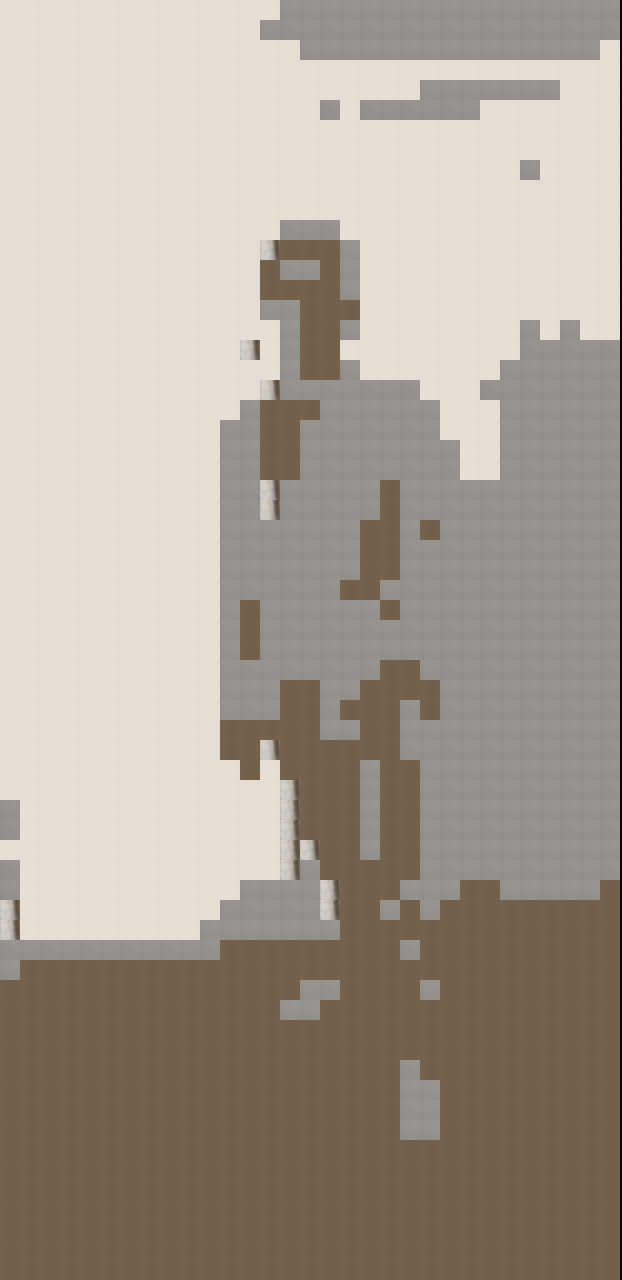

Saved as 'Tatwik_compressed_hierarchical_k4_c20.jpg'


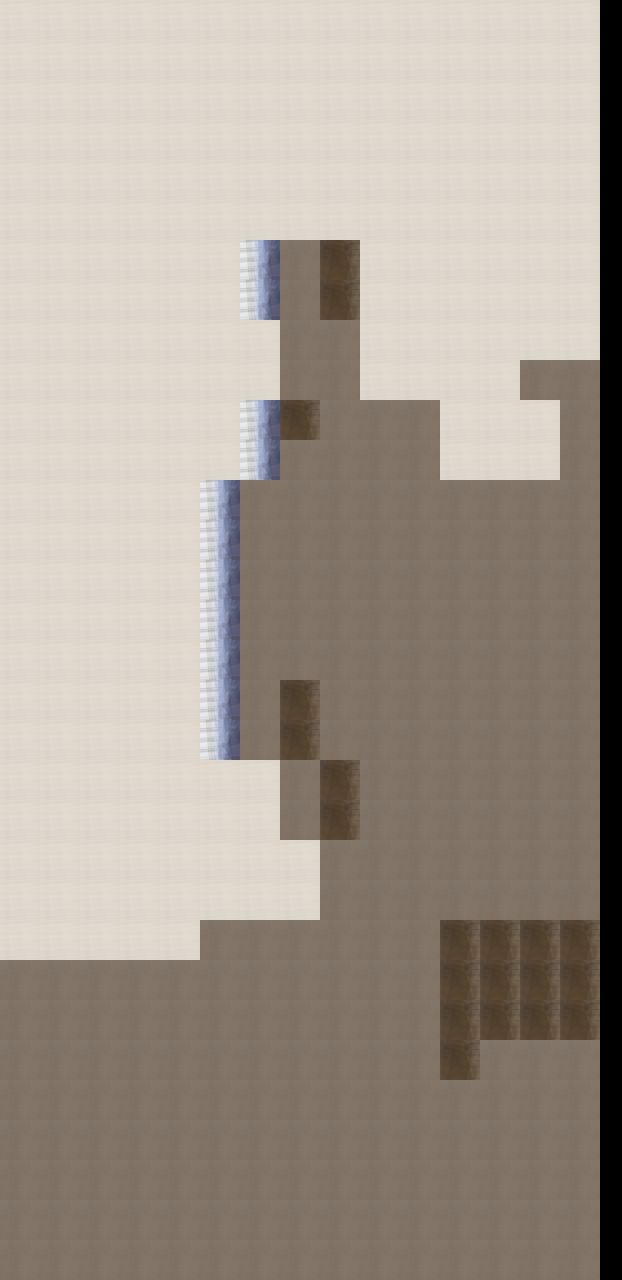

Saved as 'Tatwik_compressed_hierarchical_k4_c40.jpg'


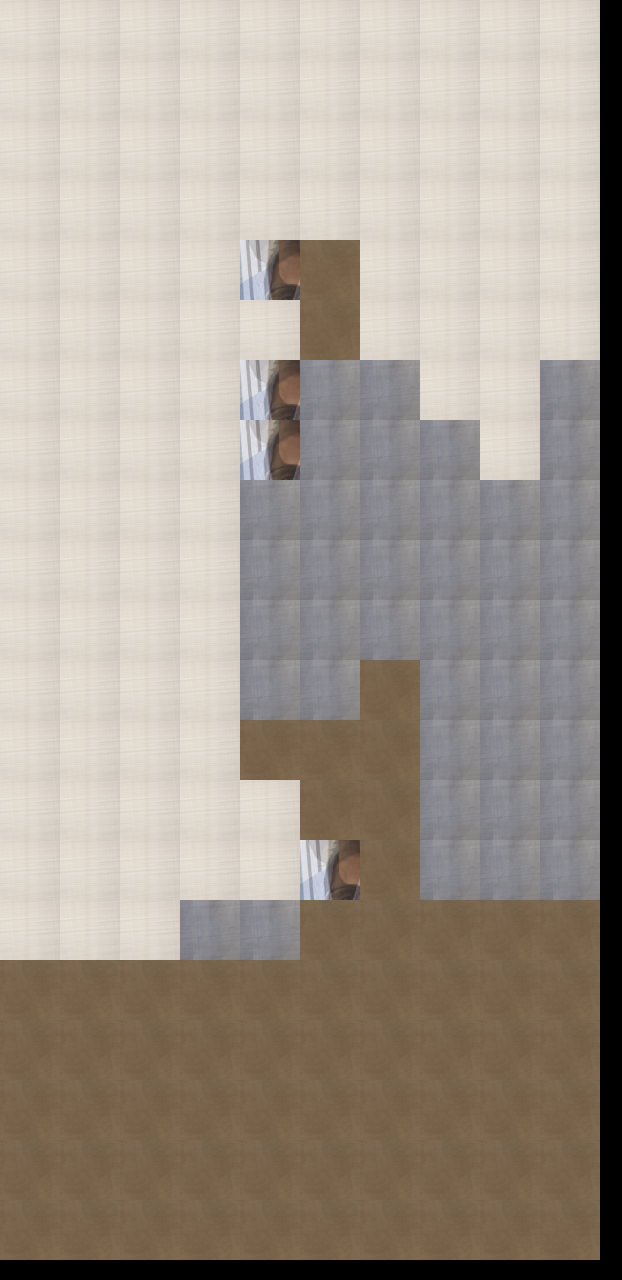

Saved as 'Tatwik_compressed_hierarchical_k4_c60.jpg'


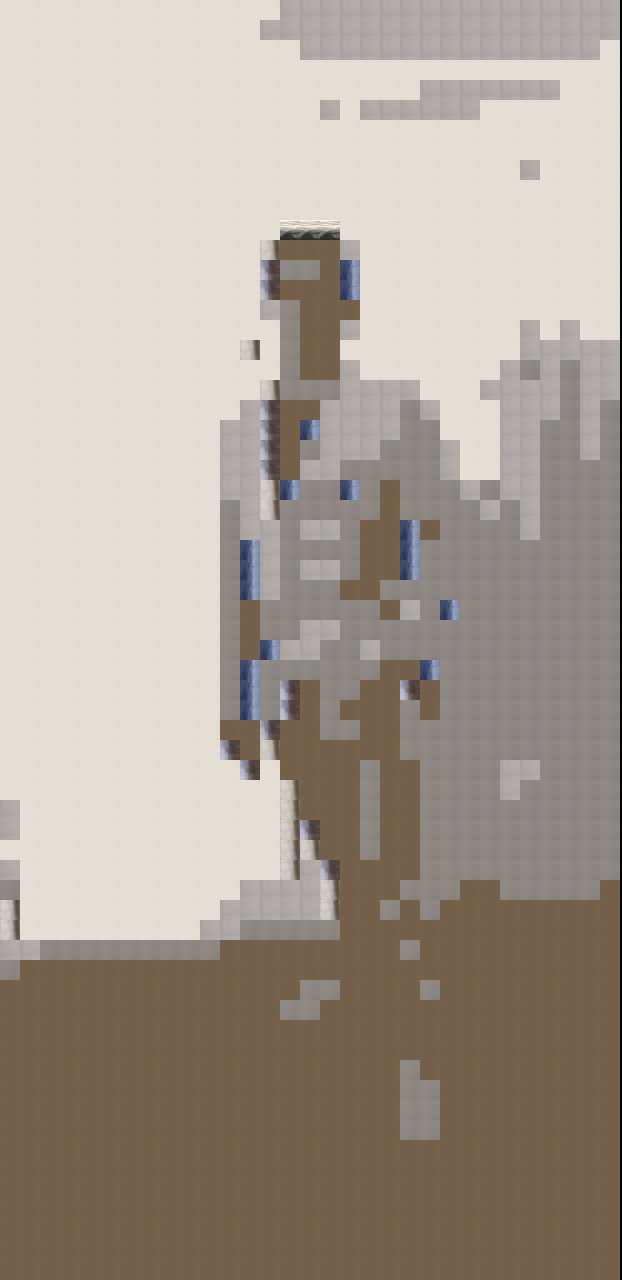

Saved as 'Tatwik_compressed_hierarchical_k8_c20.jpg'


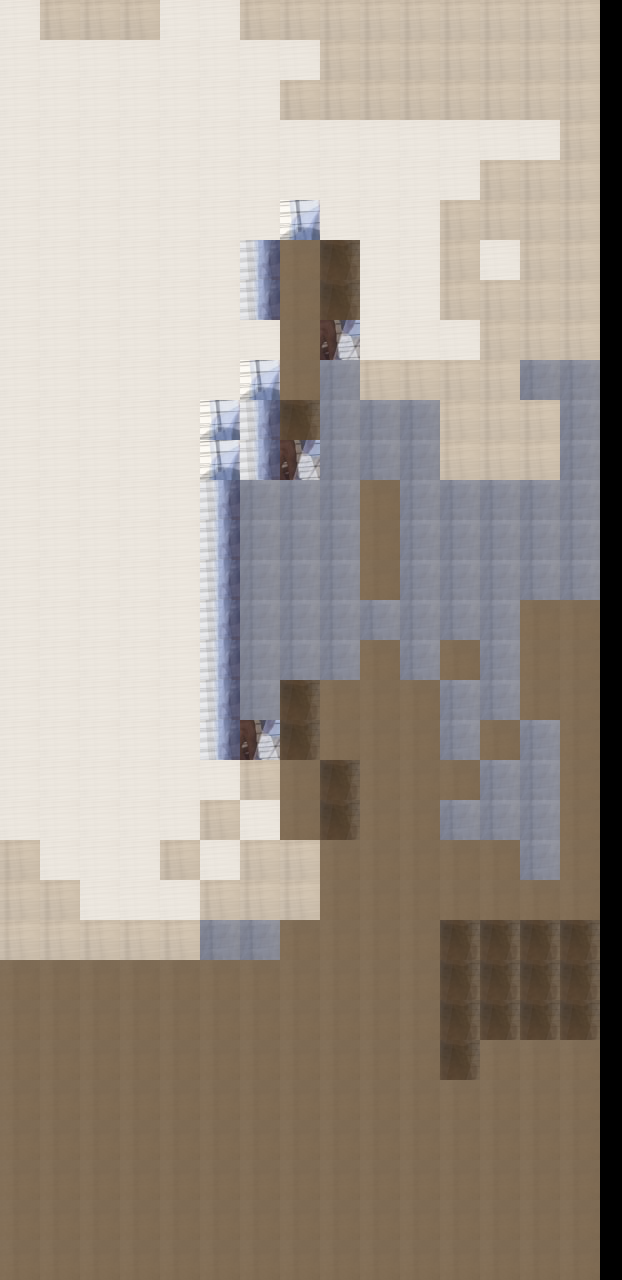

Saved as 'Tatwik_compressed_hierarchical_k8_c40.jpg'


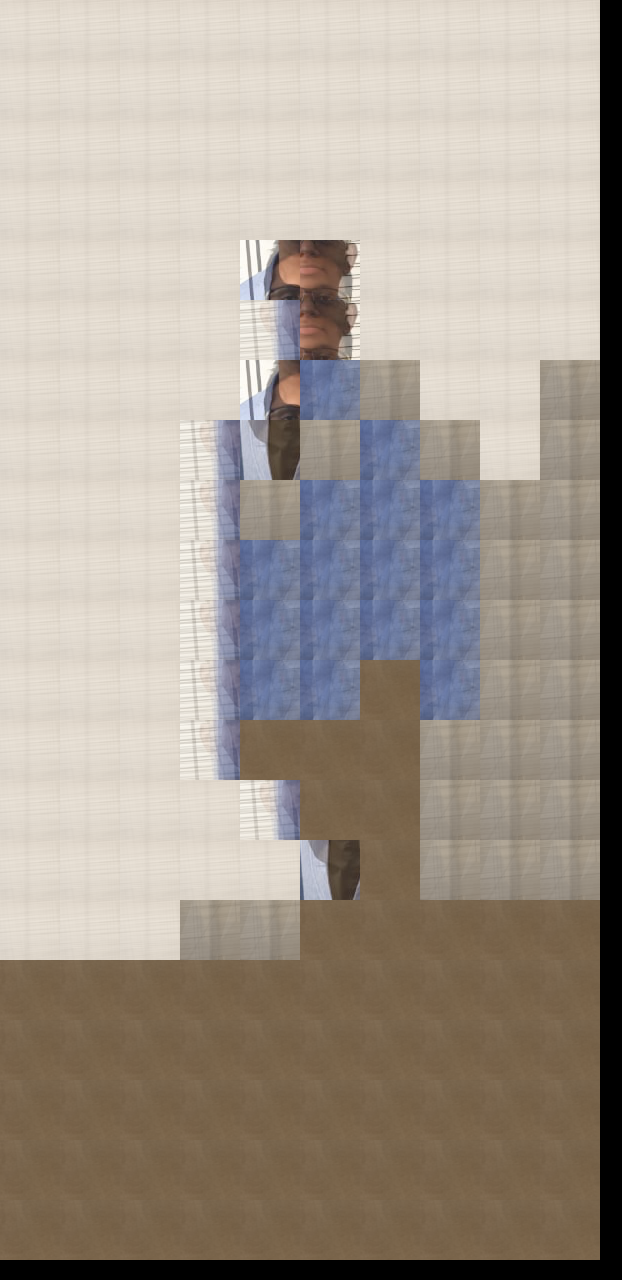

Saved as 'Tatwik_compressed_hierarchical_k8_c60.jpg'


In [7]:
results_hierarchical = []
for k in kValues:
    for c in cValues:
        # Get dimensions of the original image
        height, width, channels = image.shape
        windows = []

        for i in range(0, height - c + 1, c):
            for j in range(0, width - c + 1, c):
                window = image[i:i + c, j:j + c, :]
                windows.append(window.flatten())

        # Apply Agglomerative Clustering with complete linkage
        agglomerative = AgglomerativeClustering(n_clusters=k,
                                                linkage='complete')
        clusterIndices = agglomerative.fit_predict(windows)

        referenceVectors = []

        for clusterId in range(k):
            clusterMembers = [i for i, clusterIdx in enumerate(
                clusterIndices) if clusterIdx == clusterId]
            clusterMean = np.mean([windows[i] for i in clusterMembers], axis=0)
            referenceVectors.append(clusterMean)

        compressedImage = np.zeros((height, width, channels), dtype=np.uint8)
        windowIdx = 0

        for i in range(0, height - c + 1, c):
            for j in range(0, width - c + 1, c):
                clusterIdx = clusterIndices[windowIdx]
                reshapedReference = referenceVectors[clusterIdx].reshape(
                    (c, c, channels))
                reshapedReference = reshapedReference.astype(np.uint8)
                compressedImage[i:i + c, j:j + c, :] = reshapedReference
                windowIdx += 1

        # Calculate Mean Squared Error (MSE) between the
        # original and compressed images
        mse = ((image - compressedImage) ** 2).mean()

        # Save the compressed image
        compressedImage = Image.fromarray(compressedImage)
        display(compressedImage)
        compressedImage.save(f"Tatwik_compressed_hierarchical_k{k}_c{c}.jpg")
        print(f"Saved as 'Tatwik_compressed_hierarchical_k{k}_c{c}.jpg'")

        # Calculate compression rate based on the dimensions
        compressed_image_size = os.path.getsize(
            f"Tatwik_compressed_hierarchical_k{k}_c{c}.jpg")
        compression_rate = original_image_size/compressed_image_size

        results_hierarchical.append({
            'k': k,
            'c': c,
            'reconstructionError': mse,
            'compressionRate': compression_rate
        })

In [8]:
minReconstructionError_hierarchical = float("inf")
max_compression_rate_hierarchical = - float("inf")
best_hierarchical_k = 0
best_hierarchical_c = 0
ratio = float("inf")

for result in results_hierarchical:
    print(f'k = {result["k"]}, c = {result["c"]}')
    print('Reconstruction Error (hierarchical):',
          f'{result["reconstructionError"]:.2f}')
    print(f'Compression Rate: {result["compressionRate"]:.2f}')
    if result["reconstructionError"]/result["compressionRate"] < ratio:
        best_hierarchical_k = result["k"]
        best_hierarchical_c = result["c"]
        minReconstructionError_hierarchical = result["reconstructionError"]
        max_compression_rate_hierarchical = result["compressionRate"]
        ratio = result["reconstructionError"]/result["compressionRate"]

k = 4, c = 20
Reconstruction Error (hierarchical): 94.73
Compression Rate: 3.20
k = 4, c = 40
Reconstruction Error (hierarchical): 99.82
Compression Rate: 3.16
k = 4, c = 60
Reconstruction Error (hierarchical): 95.92
Compression Rate: 2.23
k = 8, c = 20
Reconstruction Error (hierarchical): 93.81
Compression Rate: 2.92
k = 8, c = 40
Reconstruction Error (hierarchical): 93.45
Compression Rate: 2.36
k = 8, c = 60
Reconstruction Error (hierarchical): 93.60
Compression Rate: 2.00


In [9]:
print("The best combination for hierarchical clustering:")
print(f'k (hierarchical) = {best_hierarchical_k}, c (hierarchical) = {best_hierarchical_c}')
print(f'Reconstruction Error (hierarchical): {minReconstructionError_hierarchical:.2f}')
print(f'Compression Rate (hierarchical): {max_compression_rate_hierarchical:.2f}')

The best combination for hierarchical clustering:
k (hierarchical) = 4, c (hierarchical) = 20
Reconstruction Error (hierarchical): 94.73
Compression Rate (hierarchical): 3.20


Flake8 Errors: <u>Print Statements</u>  
01_project2.ipynb#In[9]:2:80: E501 line too long (92 > 79 characters)  
01_project2.ipynb#In[9]:3:80: E501 line too long (88 > 79 characters)  
01_project2.ipynb#In[9]:4:80: E501 line too long (82 > 79 characters)